# Example notebook training of an RL agent using Ray RLlib
#### *(using th CartPole-v1 gym environnment)*

### Import requirements

In [3]:
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.models import ModelCatalog
import numpy as np
import matplotlib.pyplot as plt
import LTCRL.utils as lru               # Utilities for training LTCs with pytorch
import LTCRL.models as models

## Training an agent with a simple perceptron

### Define a config dictionary for our trainer 
Here we train on the cartpole-v1 openAI gym environment with a 2 layer 64 neuron perceptron as our policy net and PPO as our training algorithm.

In [4]:
config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "CartPole-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 8,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [16, 16],
        "fcnet_activation": "relu",
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

### Train the agent with our defined config

In [5]:
# Instanciate the PPO trainer object
trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log = []
iterations = 140
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log.append(trainer.train())
    print('len : ' + str(log[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log[i]['hist_stats']['episode_reward']).mean()))
    if i % 5 == 0:
        trainer.evaluate()
        trainer.evaluate()

2022-03-23 14:22:47,121	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-03-23 14:22:47,125	WARNING ppo.py:223 -- `train_batch_size` (4000) cannot be achieved with your other settings (num_workers=8 num_envs_per_worker=1 rollout_fragment_length=200)! Auto-adjusting `rollout_fragment_length` to 500.
(pid=96543) 
(pid=96551) 
(pid=96553) 
(pid=96544) 
(pid=96550) 
(pid=96548) 
(pid=96555) 
(pid=96557) 
2022-03-23 14:22:55,908	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-03-23 14:22:55,909	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with eac

iteration : 0 , 


(pid=96556) 


len : 22.357954545454547
avg_rev : 22.357954545454547


(RolloutWorker pid=96556) 2022-03-23 14:23:00,575	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been deprecated. Use `ray.rllib.env.remote_base_env.RemoteBaseEnv` instead. This will raise an error in the future!


iteration : 1 , 
len : 26.304635761589402
avg_rev : 26.304635761589402
iteration : 2 , 
len : 39.78
avg_rev : 39.78
iteration : 3 , 
len : 50.49
avg_rev : 50.49
iteration : 4 , 
len : 63.89
avg_rev : 63.89
iteration : 5 , 
len : 81.63
avg_rev : 81.63
iteration : 6 , 
len : 101.28
avg_rev : 101.28
iteration : 7 , 
len : 121.51
avg_rev : 121.51
iteration : 8 , 
len : 135.43
avg_rev : 135.43
iteration : 9 , 
len : 152.6
avg_rev : 152.6
iteration : 10 , 
len : 165.46
avg_rev : 165.46
iteration : 11 , 
len : 183.82
avg_rev : 183.82
iteration : 12 , 
len : 198.53
avg_rev : 198.53
iteration : 13 , 
len : 213.04
avg_rev : 213.04
iteration : 14 , 
len : 233.5
avg_rev : 233.5
iteration : 15 , 
len : 251.09
avg_rev : 251.09
iteration : 16 , 
len : 269.72
avg_rev : 269.72
iteration : 17 , 
len : 286.69
avg_rev : 286.69
iteration : 18 , 
len : 290.77
avg_rev : 290.77
iteration : 19 , 
len : 297.46
avg_rev : 297.46
iteration : 20 , 
len : 312.66
avg_rev : 312.66
iteration : 21 , 
len : 331.06
avg_re

Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

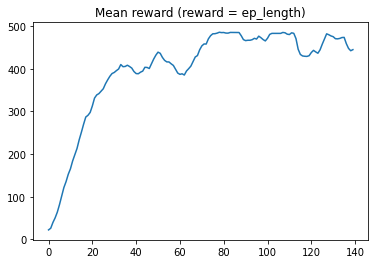

In [6]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
plt.plot(mean_rev)
plt.title('Mean reward (reward = ep_length)')

In [9]:
# Evaluate the trained Trainer (and render each timestep to the shell's
# output).
trainer.evaluate()

{'evaluation': {'episode_reward_max': 500.0,
  'episode_reward_min': 500.0,
  'episode_reward_mean': 500.0,
  'episode_len_mean': 500.0,
  'episode_media': {},
  'episodes_this_iter': 10,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0],
   'episode_lengths': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.16671488906153448,
   'mean_inference_ms': 1.4101909397598775,
   'mean_action_processing_ms': 0.08090122045384304,
   'mean_env_wait_ms': 0.12489072093178091,
   'mean_env_render_ms': 5.947043103563815},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

## Training an agent with a simple RNN

### Add our custom model to the catalog

In [2]:
ModelCatalog.register_custom_model("naiveRNN", models.NaiveRNN)

### Define a config dictionary for our trainer 
Here we train on the cartpole-v1 openAI gym environment with a simple RNN as our policy net and PPO as our training algorithm.

In [3]:
rnn_config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "CartPole-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 4,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "custom_model": "naiveRNN",
        "max_seq_len": 10,
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

In [5]:
# Instanciate the PPO trainer object
rnn_trainer = PPOTrainer(config=rnn_config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log_rnn = []
iterations = 140
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log_rnn.append(rnn_trainer.train())
    print('len : ' + str(log_rnn[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log_rnn[i]['hist_stats']['episode_reward']).mean()))

2022-03-20 23:52:50,993	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
(pid=58825) 
(pid=58831) 
(pid=58832) 
(pid=58822) 
2022-03-20 23:52:57,780	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-03-20 23:52:57,781	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-03-20 23:52:57,824	WARNING util.py:55 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=58825) 2022-03-20 23:52:57,741	WARNING deprecati

iteration : 0 , 


(pid=58826) 
(RolloutWorker pid=58826) 2022-03-20 23:53:02,491	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been deprecated. Use `ray.rllib.env.remote_base_env.RemoteBaseEnv` instead. This will raise an error in the future!


len : 21.47826086956522
avg_rev : 21.47826086956522
iteration : 1 , 
len : 22.51396648044693
avg_rev : 22.51396648044693
iteration : 2 , 
len : 20.456410256410255
avg_rev : 20.456410256410255
iteration : 3 , 
len : 22.244444444444444
avg_rev : 22.244444444444444
iteration : 4 , 
len : 20.91578947368421
avg_rev : 20.91578947368421
iteration : 5 , 
len : 26.213333333333335
avg_rev : 26.213333333333335
iteration : 6 , 
len : 26.161290322580644
avg_rev : 26.161290322580644
iteration : 7 , 
len : 28.635714285714286
avg_rev : 28.635714285714286
iteration : 8 , 
len : 35.13392857142857
avg_rev : 35.13392857142857
iteration : 9 , 
len : 41.06
avg_rev : 41.06
iteration : 10 , 
len : 25.24074074074074
avg_rev : 25.24074074074074
iteration : 11 , 
len : 30.229007633587788
avg_rev : 30.229007633587788
iteration : 12 , 
len : 28.92086330935252
avg_rev : 28.92086330935252
iteration : 13 , 
len : 31.488188976377952
avg_rev : 31.488188976377952
iteration : 14 , 
len : 36.027027027027025
avg_rev : 36.0

Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

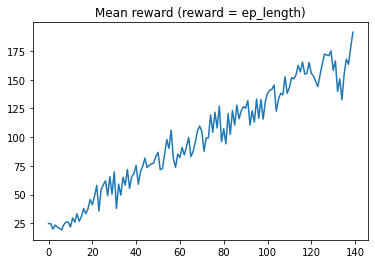

In [30]:
mean_rev_rnn = np.array(list(l['episode_reward_mean'] for l in log_rnn))
plt.plot(mean_rev_rnn)
plt.title('Mean reward (reward = ep_length)')

In [7]:
rnn_trainer.evaluate()

NameError: name 'rnn_trainer' is not defined

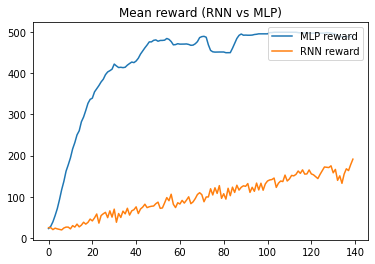

In [32]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
mean_rev_rnn = np.array(list(l['episode_reward_mean'] for l in log_rnn))
plt.plot(mean_rev,label='MLP reward')
plt.plot(mean_rev_rnn,label='RNN reward')
plt.title('Mean reward (RNN vs MLP)')
plt.legend(loc="upper right")
plt.show()